In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
diamonds = pd.read_csv('../data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2',
'VS1', 'VVS2', 'VVS1', 'IF']

In [27]:
diamonds['cut'] = pd.Categorical(diamonds['cut'],
categories=cut_cats,
ordered=True)

In [28]:
diamonds['color'] = pd.Categorical(diamonds['color'],
 categories=color_cats,
 ordered=True)

In [29]:
diamonds['clarity'] = pd.Categorical(diamonds['clarity'],
categories=clarity_cats,
ordered=True)

Text(0.5, 0.98, 'Price Decreasing with Increasing Quality?')

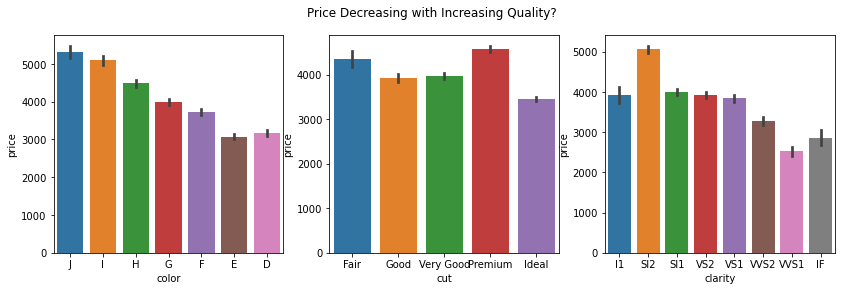

In [30]:
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='price', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='price', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='price', data=diamonds, ax=ax3)
fig.suptitle('Price Decreasing with Increasing Quality?')

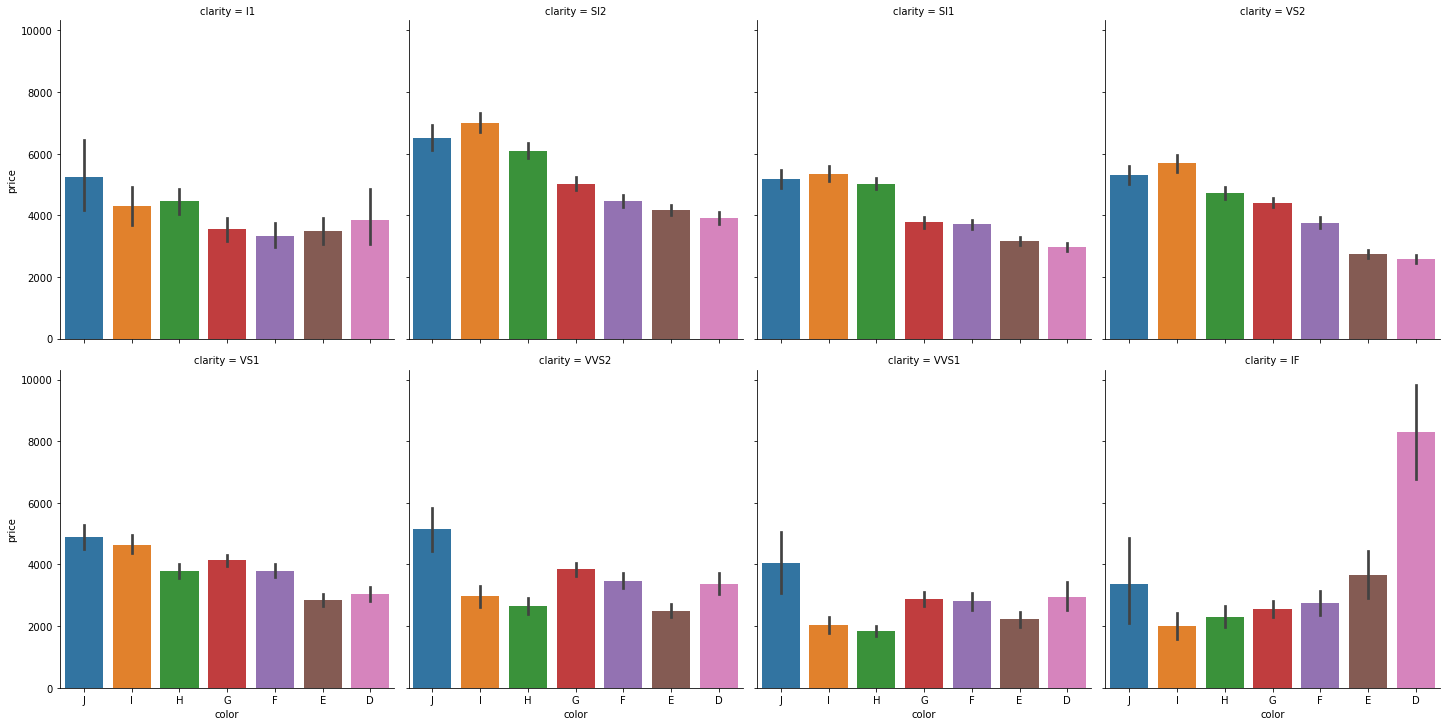

In [31]:
sns.factorplot(x='color', y='price', col='clarity',
 col_wrap=4, data=diamonds, kind='bar')

Text(0.5, 0.98, 'Diamond size decreases with quality')

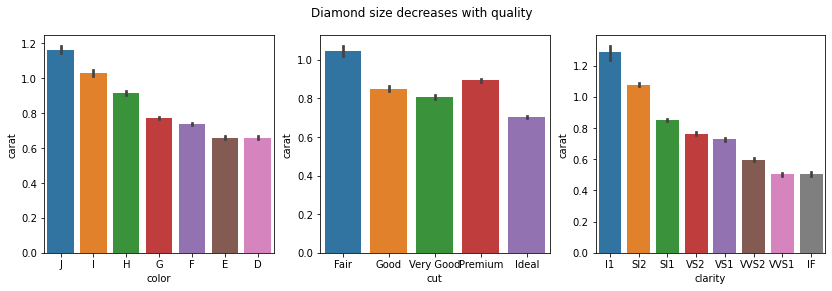

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='carat', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='carat', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='carat', data=diamonds, ax=ax3)
fig.suptitle('Diamond size decreases with quality')

Text(0.5, 1.02, 'Diamond price by size, color and clarity')

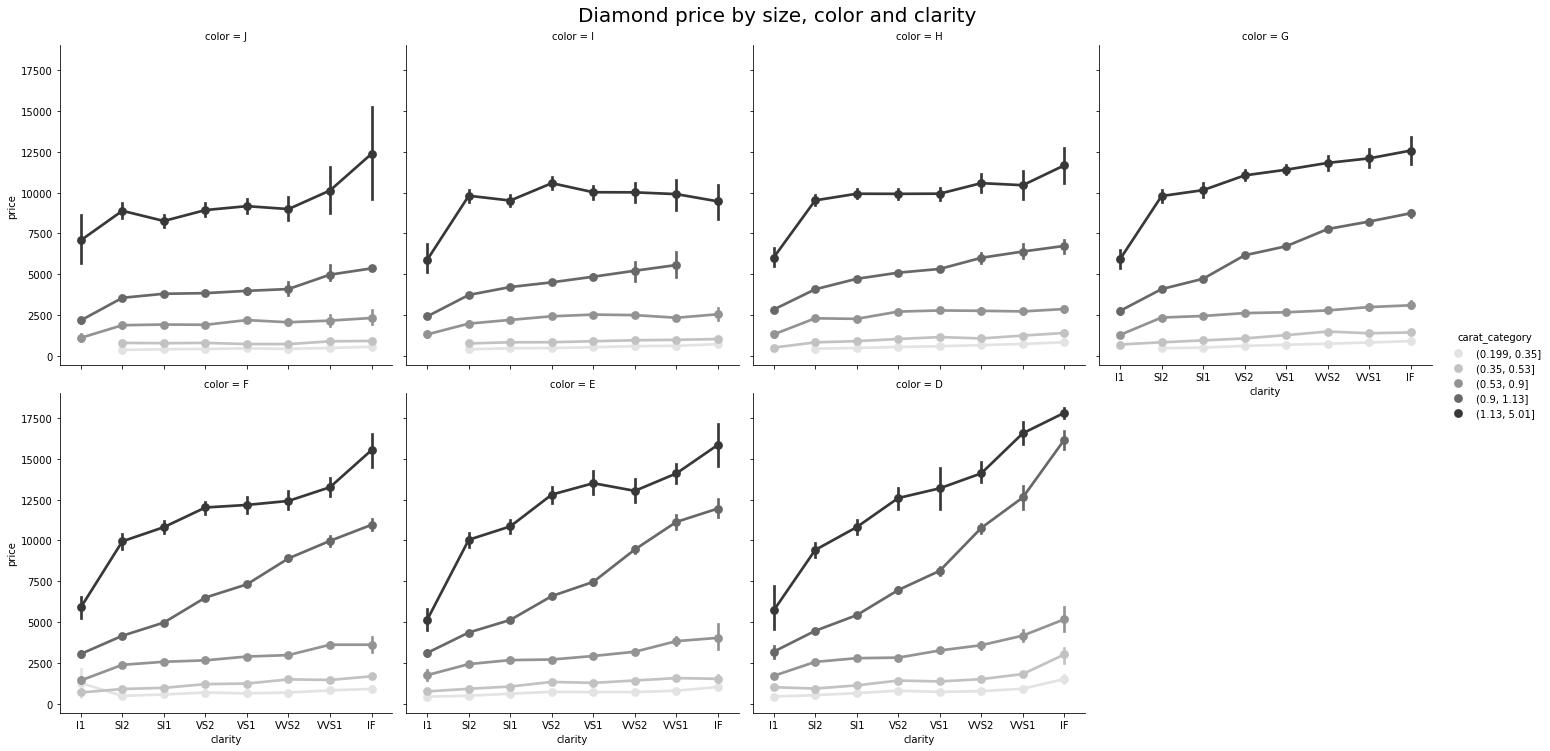

In [33]:
diamonds['carat_category'] = pd.qcut(diamonds.carat, 5)
from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))
g = sns.factorplot(x='clarity', y='price', data=diamonds,
hue='carat_category', col='color',
col_wrap=4, kind='point', palette=greys)
g.fig.suptitle('Diamond price by size, color and clarity',
y=1.02, size=20)

Text(0.5, 1.02, 'Replication of Step 3 with PairGrid')

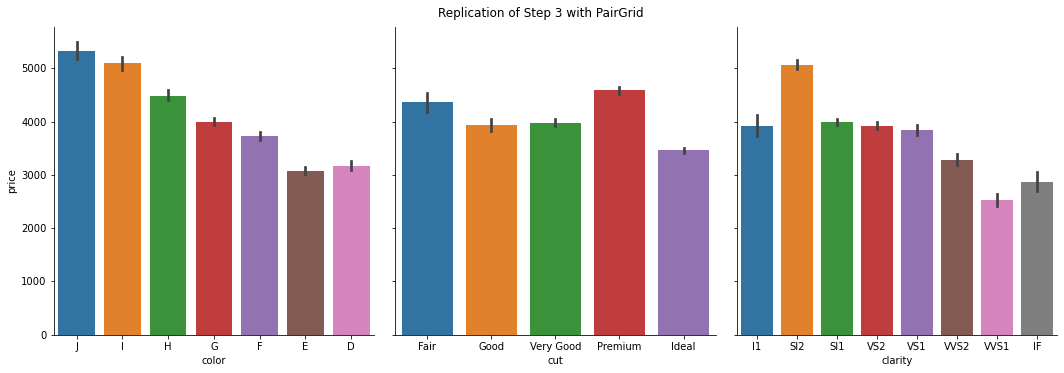

In [34]:
g = sns.PairGrid(diamonds,size=5,
x_vars=["color", "cut", "clarity"],
y_vars=["price"])
g.map(sns.barplot)
g.fig.suptitle('Replication of Step 3 with PairGrid', y=1.02)